# 0331 수업 요약
- k-최근접 이웃 회귀 알고리즘 실습
- 농어의 길이를 보고 무게 예측하기

# 0406 수업 요약
- k최근접 이웃 알고리즘에서 k 값을 변경해서 모델의 성능을 높인다.

# 0407 수업 요약
- 데이터를 훈련 세트와 데이터 세트로 분류해서 모델을 학습하고 평가한다.

# 0413 수업 요약
- k최근접 이웃 알고리즘의 한계
- 선형 회귀

# 0414 수업 요약
- 선형 회귀의 한계점을 극복한 다항 회귀 알고리즘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fish_all = pd.read_csv("./Fish.csv")
# CSV파일을 읽어 온다

fish_all

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,12.2,2.0904,1.3936
155,Smelt,13.4,12.4,2.4300,1.2690
156,Smelt,12.2,13.0,2.2770,1.2558
157,Smelt,19.7,14.3,2.8728,2.0672


In [2]:
fish_perch = fish_all[fish_all["Species"] == "Perch"]
# Species열이 Perch인 행들을 가져온다.

fish_perch

,Species,Weight,Length,Height,Width
72,Perch,5.9,8.4,2.1120,1.4080
73,Perch,32.0,13.7,3.5280,1.9992
74,Perch,40.0,15.0,3.8240,2.4320
75,Perch,51.5,16.2,4.5924,2.6316
76,Perch,70.0,17.4,4.5880,2.9415
77,Perch,100.0,18.0,5.2224,3.3216
78,Perch,78.0,18.7,5.1992,3.1234
79,Perch,80.0,19.0,5.6358,3.0502
80,Perch,85.0,19.6,5.1376,3.0368
81,Perch,85.0,20.0,5.0820,2.7720


In [3]:
perch_length = fish_perch["Length"] #fish_persh에서 Length의 값들을 가져온다/
print(perch_length)
print()
print(perch_length.shape)
print()

perch_length = perch_length.to_numpy()
perch_length = perch_length.reshape(-1, 1)
# 가져온 데이터는 1차원 구조이기때문에 numpy로 변경해주고 2차운 구조로 변경 해준다.

print(perch_length)
print(perch_length.shape)
# 독립변수 데이터들

72      8.4
73     13.7
74     15.0
75     16.2
76     17.4
77     18.0
78     18.7
79     19.0
80     19.6
81     20.0
82     21.0
83     21.0
84     21.0
85     21.3
86     22.0
87     22.0
88     22.0
89     22.0
90     22.0
91     22.5
92     22.5
93     22.7
94     23.0
95     23.5
96     24.0
97     24.0
98     24.6
99     25.0
100    25.6
101    26.5
102    27.3
103    27.5
104    27.5
105    27.5
106    28.0
107    28.7
108    30.0
109    32.8
110    34.5
111    35.0
112    36.5
113    36.0
114    37.0
115    37.0
116    39.0
117    39.0
118    39.0
119    40.0
120    40.0
121    40.0
122    40.0
123    42.0
124    43.0
125    43.0
126    43.5
127    44.0
Name: Length, dtype: float64

(56,)

[[ 8.4]
 [13.7]
 [15. ]
 [16.2]
 [17.4]
 [18. ]
 [18.7]
 [19. ]
 [19.6]
 [20. ]
 [21. ]
 [21. ]
 [21. ]
 [21.3]
 [22. ]
 [22. ]
 [22. ]
 [22. ]
 [22. ]
 [22.5]
 [22.5]
 [22.7]
 [23. ]
 [23.5]
 [24. ]
 [24. ]
 [24.6]
 [25. ]
 [25.6]
 [26.5]
 [27.3]
 [27.5]
 [27.5]
 [27.5]
 [28. ]
 [28.7]
 [3

In [4]:
perch_weight = fish_perch["Weight"]
perch_weight = perch_weight.to_numpy().reshape(-1, 1)

print(perch_weight.shape)
perch_weight # 종속변수 정답들

(56, 1)


array([[   5.9],
       [  32. ],
       [  40. ],
       [  51.5],
       [  70. ],
       [ 100. ],
       [  78. ],
       [  80. ],
       [  85. ],
       [  85. ],
       [ 110. ],
       [ 115. ],
       [ 125. ],
       [ 130. ],
       [ 120. ],
       [ 120. ],
       [ 130. ],
       [ 135. ],
       [ 110. ],
       [ 130. ],
       [ 150. ],
       [ 145. ],
       [ 150. ],
       [ 170. ],
       [ 225. ],
       [ 145. ],
       [ 188. ],
       [ 180. ],
       [ 197. ],
       [ 218. ],
       [ 300. ],
       [ 260. ],
       [ 265. ],
       [ 250. ],
       [ 250. ],
       [ 300. ],
       [ 320. ],
       [ 514. ],
       [ 556. ],
       [ 840. ],
       [ 685. ],
       [ 700. ],
       [ 700. ],
       [ 690. ],
       [ 900. ],
       [ 650. ],
       [ 820. ],
       [ 850. ],
       [ 900. ],
       [1015. ],
       [ 820. ],
       [1100. ],
       [1000. ],
       [1100. ],
       [1000. ],
       [1000. ]])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44172 missing from curre

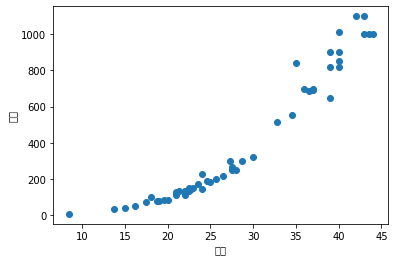

In [5]:
plt.scatter(perch_length, perch_weight)

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

In [6]:
from sklearn.neighbors import KNeighborsRegressor
# Sklearn 모듈의 K 이웃 최근접 회귀 알고리즘을 가져온다

model_knr = KNeighborsRegressor()
# 이 알고리즘을 적용할 객체를 생성한다.

model_knr.fit(perch_length, perch_weight)
# 알고리즘을 적용한다.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [7]:
length_for_wigth = [[30], [100], [20]] # 종속변수를 만들어 준다.

predict_weigth = model_knr.predict(length_for_wigth) # 만들어준 종속변수를 주고 결과를 예측 한다.
predict_weigth

array([[ 279.],
       [1040.],
       [  95.]])

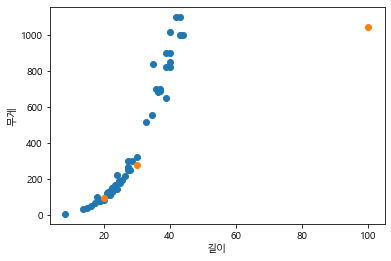

In [8]:
plt.scatter(perch_length, perch_weight)
plt.scatter(length_for_wigth, predict_weigth)

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

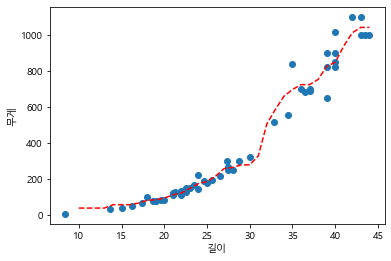

In [9]:
lengthLine = np.arange(10, 45).reshape(-1, 1)

plt.scatter(perch_length, perch_weight)
plt.plot(lengthLine, model_knr.predict(lengthLine), "r--")

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

In [10]:
model_knr.score(perch_length, perch_weight)

0.9793648682718722

In [11]:
from sklearn.metrics import mean_absolute_error

score_mae = mean_absolute_error(perch_weight, model_knr.predict(perch_length))
score_mae # 30g 정도의 오차가 있다

30.569285714285716

# 0406 수업

In [12]:
model_knr_1 = KNeighborsRegressor()
model_knr_1.n_neighbors = 1 #k최근접 이웃 알고리즘에서 k의 값을 변경한다
model_knr_1.fit(perch_length, perch_weight)

model_knr_5 = KNeighborsRegressor()
model_knr_5.n_neighbors = 5
model_knr_5.fit(perch_length, perch_weight)

model_knr_10 = KNeighborsRegressor()
model_knr_10.n_neighbors = 10
model_knr_10.fit(perch_length, perch_weight)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

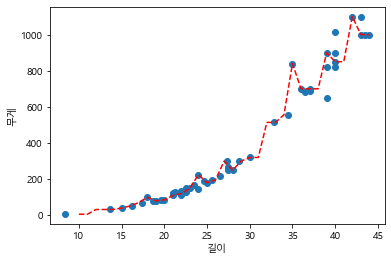

0.9823618210143489
15.267857142857142


In [13]:
x = np.arange(10, 45).reshape(-1, 1)
perdiction_line_k1 = model_knr_1.predict(x)

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.scatter(perch_length, perch_weight)
plt.plot(x, perdiction_line_k1, "r--")

plt.show()

score_k1 = model_knr_1.score(perch_length, perch_weight)
print(score_k1)
score_mae_k1 = mean_absolute_error(perch_weight, model_knr_1.predict(perch_length))
print(score_mae_k1)

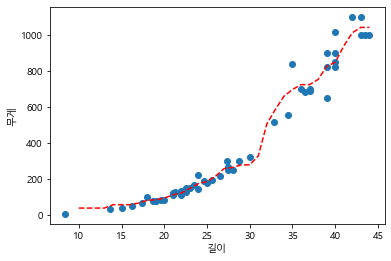

0.9793648682718722
30.569285714285716


In [14]:
x = np.arange(10, 45).reshape(-1, 1)
perdiction_line_k5 = model_knr_5.predict(x)

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.scatter(perch_length, perch_weight)
plt.plot(x, perdiction_line_k5, "r--")

plt.show()

score_k5 = model_knr_5.score(perch_length, perch_weight)
print(score_k5)
score_mae_k5 = mean_absolute_error(perch_weight, model_knr_5.predict(perch_length))
print(score_mae_k5)

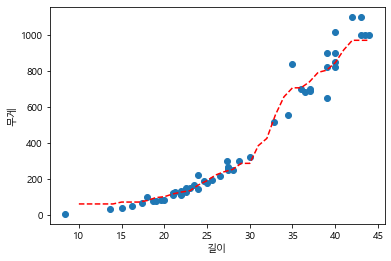

0.9758051075466483
35.35053571428572


In [15]:
x = np.arange(10, 45).reshape(-1, 1)
perdiction_line_k10 = model_knr_10.predict(x)

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.scatter(perch_length, perch_weight)
plt.plot(x, perdiction_line_k10, "r--")

plt.show()

score_k10 = model_knr_10.score(perch_length, perch_weight)
print(score_k10)
score_mae_k10 = mean_absolute_error(perch_weight, model_knr_10.predict(perch_length))
print(score_mae_k10)

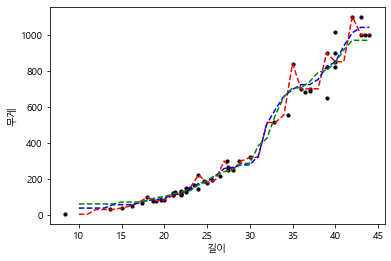

In [16]:
plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.scatter(perch_length, perch_weight, s=10, color="k")
plt.plot(x, perdiction_line_k1, "r--")
plt.plot(x, perdiction_line_k5, "b--")
plt.plot(x, perdiction_line_k10, "g--")

plt.show()

In [17]:
perdiction_line_k1

array([[   5.9],
       [   5.9],
       [  32. ],
       [  32. ],
       [  32. ],
       [  40. ],
       [  51.5],
       [  70. ],
       [ 100. ],
       [  80. ],
       [  85. ],
       [ 110. ],
       [ 120. ],
       [ 150. ],
       [ 225. ],
       [ 180. ],
       [ 197. ],
       [ 300. ],
       [ 250. ],
       [ 300. ],
       [ 320. ],
       [ 320. ],
       [ 514. ],
       [ 514. ],
       [ 556. ],
       [ 840. ],
       [ 700. ],
       [ 700. ],
       [ 700. ],
       [ 900. ],
       [ 850. ],
       [ 850. ],
       [1100. ],
       [1000. ],
       [1000. ]])

# 0407 수업

In [18]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 훈련입력, 테스트 입력, 훈력 결과, 테스트 결과
# random_state : 데이터를 섞는 시드

print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

(42, 1) (42, 1) (14, 1) (14, 1)


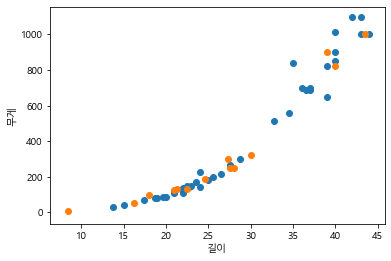

In [19]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

In [20]:
model_knr = KNeighborsRegressor()
model_knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

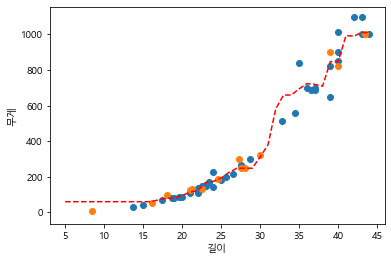

In [21]:
x = np.arange(5, 45).reshape(-1, 1)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(x, model_knr.predict(x), "r--")

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

In [22]:
length_for_weight = [[30]]

predict_weight = model_knr.predict(length_for_weight)

print(predict_weight)

[[311.4]]


In [23]:
score_knr = model_knr.score(test_input, test_target)
print(score_knr)

score_mean = mean_absolute_error(test_target, model_knr.predict(test_input))
print(score_mean)

0.9928094061010639
19.157142857142862


In [24]:
score_train = model_knr.score(train_input, train_target)
print(score_train)

score_test = model_knr.score(test_input, test_target)
print(score_test)

0.9698823289099255
0.9928094061010639


In [25]:
model_knr3 = KNeighborsRegressor()
model_knr3.n_neighbors = 3

model_knr3.fit(train_input, train_target)

score_train3 = model_knr3.score(train_input, train_target)
print(score_train3)

score_test3 = model_knr3.score(test_input, test_target)
print(score_test3)

0.9804899950518966
0.974645996398761


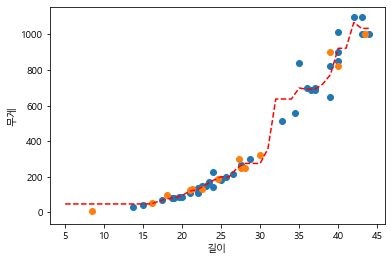

In [26]:
x = np.arange(5, 45).reshape(-1, 1)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(x, model_knr3.predict(x), "r--")

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

# 0413 수업

In [27]:
print(model_knr3.predict([[50]]))
print(model_knr3.predict([[60]]))

# k최근접 이웃 알고리즘의 한계점

[[1033.33333333]]
[[1033.33333333]]


In [28]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [29]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(train_input, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(model_lr.predict([[50]]))
print(model_lr.predict([[60]]))

[[1241.83860323]]
[[1632.01005286]]


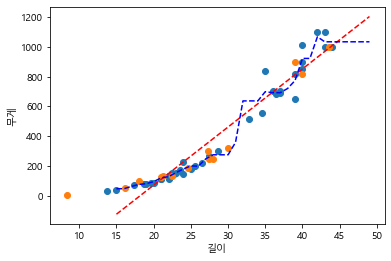

In [31]:
x = np.arange(15, 50).reshape(-1, 1)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(x, model_lr.predict(x), "r--")
plt.plot(x, model_knr3.predict(x), "b--")

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

In [32]:
a = model_lr.coef_ # 선형회귀 추세선의 기울기
b = model_lr.intercept_ # 선형회귀 주세선의 y절편

print(a, b)
print("모델이 나타내는 추세선의 기울기 :", a[0][0])
print("모델이 나타내는 추세선의 y절편 :", b[0])
print("모델이 나타내는 추세선 : y = %fx %+f" %(a[0][0], b[0]))

[[39.01714496]] [-709.01864495]
모델이 나타내는 추세선의 기울기 : 39.0171449636302
모델이 나타내는 추세선의 y절편 : -709.0186449535477
모델이 나타내는 추세선 : y = 39.017145x -709.018645


In [33]:
score_train_lr = model_lr.score(train_input, train_target)
print(score_train_lr)

score_test_lr = model_lr.score(test_input, test_target)
print(score_test_lr)

0.9398463339976039
0.8247503123313558


# 0414 수업

In [38]:
train_input_ploy = np.column_stack((train_input, train_input ** 2))
# np.column_stack 함수는 nparray에 컬럼을 추가로 붙여준다.
print(train_input_ploy[0:5])
print(train_input_ploy.shape)


test_input_ploy = np.column_stack((test_input, test_input ** 2))
print(test_input_ploy[0:5])
print(test_input_ploy.shape)

[[  19.6   384.16]
 [  22.    484.  ]
 [  18.7   349.69]
 [  17.4   302.76]
 [  36.   1296.  ]]
(42, 2)
[[  8.4   70.56]
 [ 18.   324.  ]
 [ 27.5  756.25]
 [ 21.3  453.69]
 [ 22.5  506.25]]
(14, 2)


In [44]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures는 자동으로 다항 데이터를 만들어준다.

poly_d2 = PolynomialFeatures(degree=2, include_bias=False)
train_poly = poly_d2.fit_transform(train_input)
print(train_poly[0:5])
print(train_poly.shape)


test_poly = poly_d2.fit_transform(test_input)
print(test_poly[0:5])
print(test_poly.shape)

[[  19.6   384.16]
 [  22.    484.  ]
 [  18.7   349.69]
 [  17.4   302.76]
 [  36.   1296.  ]]
(42, 2)
[[  8.4   70.56]
 [ 18.   324.  ]
 [ 27.5  756.25]
 [ 21.3  453.69]
 [ 22.5  506.25]]
(14, 2)


In [48]:
model_lr_polt = LinearRegression()
model_lr_polt.fit(train_poly, train_target)

print(model_lr_polt.predict([[50, 50**2]]))

[[1573.98423528]]


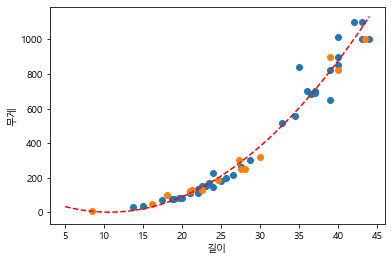

In [67]:
x = np.arange(5, 45).reshape(-1, 1)
x_ploy = poly_d2.fit_transform(x)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(x, model_lr_polt.predict(x_ploy), "r--")

plt.rc("font", family="Malgun Gothic")
plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

In [78]:
a_poly = model_lr_polt.coef_
b_ploy = model_lr_polt.intercept_


print(a_poly, b_ploy)
print("모델이 나타내는 추세선의 1차항 계수 :", a_poly[0][0])
print("모델이 나타내는 추세선의 2차항 계수 :", a_poly[0][1])
print("모델이 나타내는 수세선의 절편 : ", b_ploy[0])
print("모델이 나타내는 추세선 : y = %+f x^2 %+f x %+f" % (a_poly[0][1], a_poly[0][0], b_ploy[0]) )

[[-21.55792498   1.01433211]] [116.05021078]
모델이 나타내는 추세선의 1차항 계수 : -21.557924978837402
모델이 나타내는 추세선의 2차항 계수 : 1.0143321093767306
모델이 나타내는 수세선의 절편 :  116.05021078278372
모델이 나타내는 추세선 : y = +1.014332 x^2 -21.557925 x +116.050211


In [80]:
score_train_lr_poly = model_lr_polt.score(train_poly, train_target)
print(score_train_lr_poly)

score_test_lr_poly = model_lr_polt.score(test_poly, test_target)
print(score_test_lr_poly)

0.9706807451768623
0.9775935108325123
